# 1. a. Using only title as text feature

In [189]:
import pandas as pd

In [190]:
df=pd.read_csv('train.csv')

In [191]:
df.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [192]:
#dropping Nan values
df=df.dropna()

In [193]:
X=df.drop('label',axis=1)

In [194]:
y=df['label']

In [195]:
print(X.shape)
print(y.shape)

(18285, 4)
(18285,)


In [196]:
X.head(5)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [197]:
import tensorflow as tf

In [198]:
tf.__version__

'2.8.0'

In [199]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

# One hot representation

In [200]:
messages=X.copy()

In [201]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [202]:
messages.reset_index(inplace=True)

In [203]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [204]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [205]:
stem_obj=PorterStemmer()
# for word in messages['title'][1]:
corpus=[]

for i in range(len(messages['title'])):
    messages_preprocess=re.sub('[^a-zA-Z]', ' ',messages['title'][i] )
    messages_preprocess=messages_preprocess.lower()
    messages_preprocess=messages_preprocess.split()

    stemmed_sentance=[]
    for word in messages_preprocess:
        if word not in set(stopwords.words('english')):
            stemmed_word=stem_obj.stem(word)
            stemmed_sentance.append(stemmed_word)
    #     stemmed_sentance=' '.join(stemmed_sentance)
    stemmed_sentance=' '.join(stemmed_sentance)
    corpus.append(stemmed_sentance)


In [206]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [207]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [208]:
vocab_size=5000

In [209]:
one_hot_message_list=[one_hot(sentance,vocab_size) for sentance in corpus]


In [210]:
print(len(one_hot_message_list[0]))

10


In [211]:
pad_length=20
padded_messages=pad_sequences(one_hot_message_list,padding='pre',maxlen=pad_length)
print(padded_messages)

[[   0    0    0 ... 4842 3186 1852]
 [   0    0    0 ... 2698 1827 4990]
 [   0    0    0 ... 1222 1720 3890]
 ...
 [   0    0    0 ... 2280 4219  989]
 [   0    0    0 ... 2211 2421  578]
 [   0    0    0 ... 1701 2809 4632]]


In [212]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=40, input_length=pad_length))
model.add(LSTM(units=100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               56400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [213]:
len(padded_messages),y.shape

(18285, (18285,))

In [214]:
import numpy as np
X_final=np.array(padded_messages)
y_final=np.array(y)

In [215]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [217]:
history2 = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
192/192 [==============================] - 13s 38ms/step - loss: 0.3303 - accuracy: 0.8442 - val_loss: 0.2064 - val_accuracy: 0.9171
Epoch 2/5
192/192 [==============================] - 6s 32ms/step - loss: 0.1368 - accuracy: 0.9452 - val_loss: 0.2205 - val_accuracy: 0.9211
Epoch 3/5
192/192 [==============================] - 6s 32ms/step - loss: 0.0935 - accuracy: 0.9647 - val_loss: 0.2236 - val_accuracy: 0.9200
Epoch 4/5
192/192 [==============================] - 6s 33ms/step - loss: 0.0643 - accuracy: 0.9770 - val_loss: 0.2800 - val_accuracy: 0.9162
Epoch 5/5
192/192 [==============================] - 6s 32ms/step - loss: 0.0445 - accuracy: 0.9849 - val_loss: 0.2732 - val_accuracy: 0.9122


In [229]:
model_evaluate=model.evaluate(X_test,y_test,return_dict=True)

189/189 [==============================] - 2s 8ms/step - loss: 0.2732 - accuracy: 0.9122


In [230]:
import matplotlib
import matplotlib.pyplot as plt

train_loss=history2.history['loss']
val_loss=history2.history['val_loss']
train_acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']

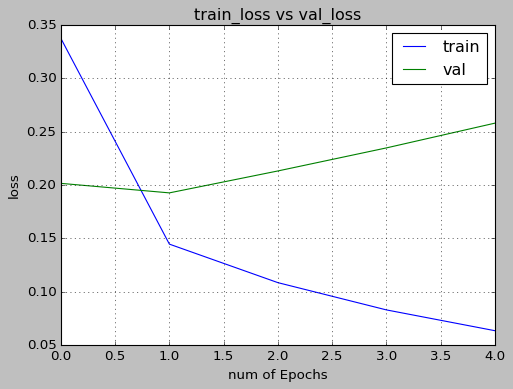

In [231]:
xc=range(5)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
# print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


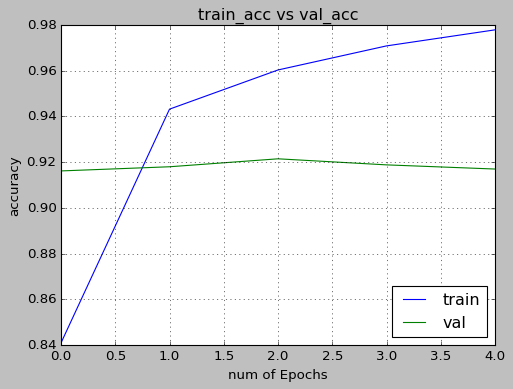

In [232]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# 1. b. Same model as above with drop out layers

In [233]:
from tensorflow.keras.layers import Dropout

model1=Sequential()
model1.add(Embedding(input_dim=vocab_size, output_dim=40, input_length=pad_length))
model1.add(Dropout(0.3))
model1.add(LSTM(units=100))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_8 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_6 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [234]:
history2 = model1.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
192/192 [==============================] - 12s 44ms/step - loss: 0.3431 - accuracy: 0.8396 - val_loss: 0.2026 - val_accuracy: 0.9165
Epoch 2/5
192/192 [==============================] - 6s 34ms/step - loss: 0.1515 - accuracy: 0.9402 - val_loss: 0.1967 - val_accuracy: 0.9186
Epoch 3/5
192/192 [==============================] - 6s 33ms/step - loss: 0.1111 - accuracy: 0.9590 - val_loss: 0.2025 - val_accuracy: 0.9206
Epoch 4/5
192/192 [==============================] - 6s 33ms/step - loss: 0.0864 - accuracy: 0.9682 - val_loss: 0.2305 - val_accuracy: 0.9104
Epoch 5/5
192/192 [==============================] - 6s 33ms/step - loss: 0.0679 - accuracy: 0.9760 - val_loss: 0.2476 - val_accuracy: 0.9158


In [235]:
train_loss=history2.history['loss']
val_loss=history2.history['val_loss']
train_acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']

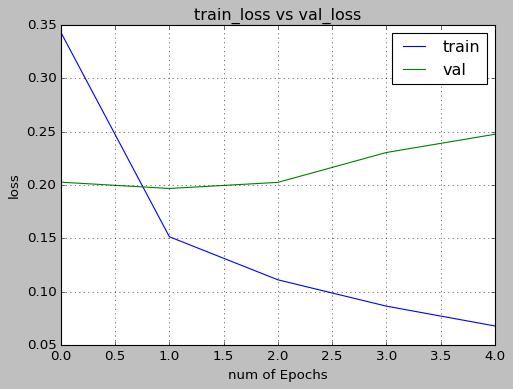

In [236]:
xc=range(5)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
# print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


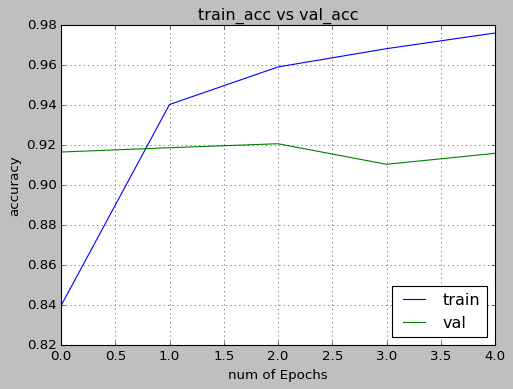

In [237]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [238]:
model_evaluate=model1.evaluate(X_test,y_test,return_dict=True)

189/189 [==============================] - 2s 8ms/step - loss: 0.2476 - accuracy: 0.9158


# 2. Adding author name to feature text

In [239]:
corpus1 = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['author'][i])
#     review = re.sub(r"\s+", '_', review)
    review= re.sub(' +','_',review)
    review = review.lower()
    corpus1.append(review)

In [240]:
messages['new_author'] = corpus1

In [241]:
messages['new_title'] = corpus

In [242]:
messages["concat_text"] = messages["new_title"] + " " + messages["new_author"]

In [243]:
messages

,index,id,title,author,text,new_author,new_title,concat_text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,darrell_lucus,hous dem aid even see comey letter jason chaff...,hous dem aid even see comey letter jason chaff...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,daniel_j_flynn,flynn hillari clinton big woman campu breitbart,flynn hillari clinton big woman campu breitbar...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",consortiumnews_com,truth might get fire,truth might get fire consortiumnews_com
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,jessica_purkiss,civilian kill singl us airstrik identifi,civilian kill singl us airstrik identifi jessi...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,howard_portnoy,iranian woman jail fiction unpublish stori wom...,iranian woman jail fiction unpublish stori wom...
...,...,...,...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,jerome_hudson,rapper trump poster child white supremaci,rapper trump poster child white supremaci jero...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,benjamin_hoffman,n f l playoff schedul matchup odd new york time,n f l playoff schedul matchup odd new york tim...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,michael_j_de_la_merced_and_rachel_abrams,maci said receiv takeov approach hudson bay ne...,maci said receiv takeov approach hudson bay ne...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",alex_ansary,nato russia hold parallel exercis balkan,nato russia hold parallel exercis balkan alex_...


In [244]:
messages["concat_text"][0]

'hous dem aid even see comey letter jason chaffetz tweet darrell_lucus'

In [250]:
new_list=list(messages["concat_text"])

In [251]:
vocab_size=5000
one_hot_message_list=[one_hot(sentance,vocab_size) for sentance in new_list]
print(len(one_hot_message_list[0]))
pad_length=20
padded_messages=pad_sequences(one_hot_message_list,padding='pre',maxlen=pad_length)
print(padded_messages)

12
[[   0    0    0 ... 1852 2975 1398]
 [   0    0    0 ... 4808 3946 1565]
 [   0    0    0 ... 3890 2866   96]
 ...
 [   0    0 1834 ... 2600 4609 1712]
 [   0    0    0 ...  578  610 2253]
 [   0    0    0 ... 4632 2853  172]]


In [252]:
from tensorflow.keras.layers import Dropout

model2=Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=40, input_length=pad_length))
model2.add(Dropout(0.3))
model2.add(LSTM(units=100))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_12 (Dropout)        (None, 20, 40)            0         
                                                                 
 lstm_8 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [253]:
len(padded_messages),y.shape

(18285, (18285,))

In [254]:
import numpy as np
X_final=np.array(padded_messages)
y_final=np.array(y)

In [255]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [257]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
192/192 [==============================] - 16s 44ms/step - loss: 0.2389 - accuracy: 0.8971 - val_loss: 0.0587 - val_accuracy: 0.9798
Epoch 2/5
192/192 [==============================] - 7s 36ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0390 - val_accuracy: 0.9869
Epoch 3/5
192/192 [==============================] - 7s 35ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0420 - val_accuracy: 0.9838
Epoch 4/5
192/192 [==============================] - 7s 35ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.0422 - val_accuracy: 0.9861
Epoch 5/5
192/192 [==============================] - 7s 36ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0351 - val_accuracy: 0.9872


In [258]:
train_loss=history2.history['loss']
val_loss=history2.history['val_loss']
train_acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']

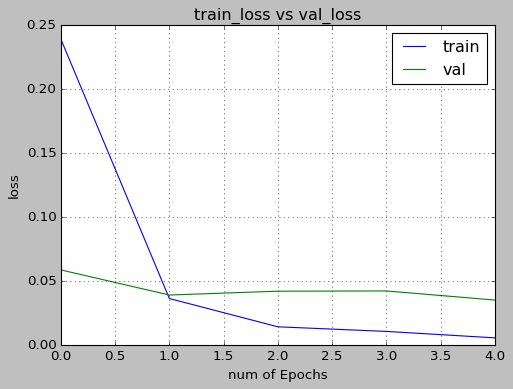

In [259]:
xc=range(5)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
# print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

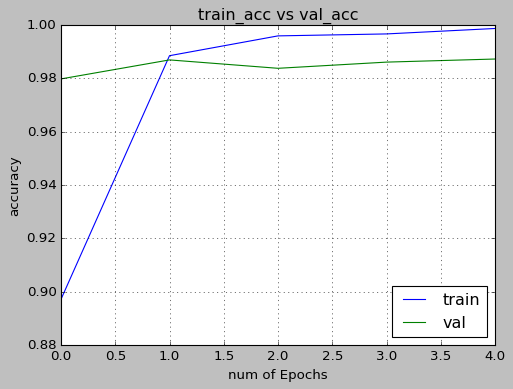

In [260]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [188]:
model_evaluate=model2.evaluate(X_test,y_test,return_dict=True)

189/189 [==============================] - 2s 8ms/step - loss: 0.0383 - accuracy: 0.9871


In [266]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Loss", "Accuracy"]
x.add_row(["1.Using only title as text feature", 0.2732, 0.9122])
x.add_row(["2.Same model as above with drop out layers",0.2476, 0.9158])
x.add_row(["3.Adding author name to feature text", 0.0383, 0.9871])

In [268]:
x

Model,Loss,Accuracy
1.Using only title as text feature,0.2732,0.9122
2.Same model as above with drop out layers,0.2476,0.9158
3.Adding author name to feature text,0.0383,0.9871
